<a href="https://colab.research.google.com/github/shahlafakouri/ShahlaFakouri2023/blob/main/CNNshahlaFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# reading data file
df = pd.read_csv('/content/drive/MyDrive/data/WELFake_Dataset.csv')


In [ ]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
#Defining column titles

df.columns = ["id","title","text","label"]

In [ ]:
df.head()

,id,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      72134 non-null  int64 
 1   title   71576 non-null  object
 2   text    72095 non-null  object
 3   label   72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


# Preprocessing and Feature Extraction Phase

In [ ]:
# remove unwanted column entries (id and title)

df.drop(labels=['id','title'], axis='columns', inplace=True)


In [ ]:
df['text']

0        No comment is expected from Barack Obama Membe...
1           Did they post their votes for Hillary already?
2         Now, most of the demonstrators gathered last ...
3        A dozen politically active pastors came here f...
4        The RS-28 Sarmat missile, dubbed Satan 2, will...
                               ...                        
72129    WASHINGTON (Reuters) - Hackers believed to be ...
72130    You know, because in fantasyland Republicans n...
72131    Migrants Refuse To Leave Train At Refugee Camp...
72132    MEXICO CITY (Reuters) - Donald Trump’s combati...
72133    Goldman Sachs Endorses Hillary Clinton For Pre...
Name: text, Length: 72134, dtype: object

In [ ]:
# Removing null values from text

df.dropna(subset = ["text"], inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 72095 entries, 0 to 72133
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    72095 non-null  object
 1   label   72095 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


In [ ]:
# Defining function to remove stopwords
from gensim.parsing.preprocessing import remove_stopwords # shahla: we need to use a better stopwords library
def stopword_removal(row):
    text = row['text']
    text = remove_stopwords(text)
    return text

In [ ]:
#Call to remove stopwords on each row

df['text'] = df.apply(stopword_removal, axis=1)

In [ ]:
# Case folding.

df['text'] = df['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ').str.replace('\d', ' ')

<ipython-input-61-196c781e8b9f>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ').str.replace('\d', ' ')


In [ ]:
# assign text samples and their labels and print no of rows in 'texts'

texts = df['text']
labels = df['label']

print('Found %s texts.' %texts.shape[0])

Found 72095 texts.


In [ ]:
# Fill NaN values with "" in the texts column

texts = texts.fillna("")

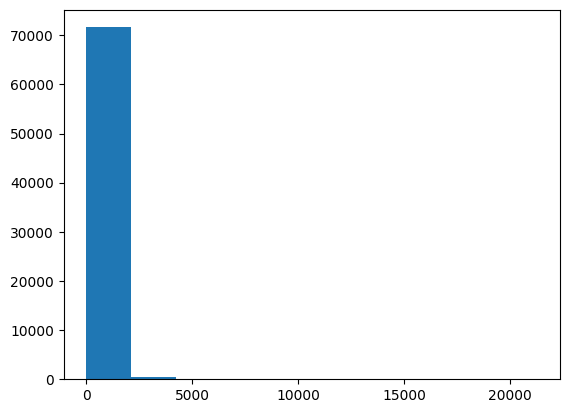

In [ ]:
# plot the distribution of article lengths in terms of word counts

text_lengths = texts.apply(lambda x: len(x.split(" ")))
plt.hist(text_lengths)
plt.show()

In [ ]:
pd.Series(text_lengths).describe()

count    72095.000000
mean       348.076885
std        397.522542
min          1.000000
25%        151.000000
50%        258.000000
75%        434.000000
max      21261.000000
Name: text, dtype: float64

In [ ]:
MAX_SEQUENCE_LENGTH = 600 # shahla: default 700
MAX_NUM_WORDS = 1000 # shahla: default 1000
EMBEDDING_DIM = 300 # shahla
TEST_SPLIT = 0.1

In [ ]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# This added by Shahla for Tokenization and Padding
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
from collections import Counter
import string
import re

def preprocess_string(s):
    # Remove all non-word characters (everything except numbers and letters)
    s = re.sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespaces with no space
    s = re.sub(r"\s+", '', s)
    # replace digits with no space
    s = re.sub(r"\d", '', s)
    return s

def tockenize(x_train, x_val, x_test):
    word_list = []

    stop_words = set(stopwords.words('english')) 
    for sent in x_train:
        for word in sent.lower().split():
            word = preprocess_string(word)
            if word not in stop_words and word != '':
                word_list.append(word)
    corpus = Counter(word_list)
    # sorting on the basis of most common words
    corpus_ = sorted(corpus,key=corpus.get,reverse=True)[:2000]
    # creating a dict
    onehot_dict = {w:i+1 for i,w in enumerate(corpus_)}
    
    # tockenize
    final_list_train, final_list_val, final_list_test = [], [], []
    for sent in x_train:
            final_list_train.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split() 
                                     if preprocess_string(word) in onehot_dict.keys()])
    for sent in x_val:
            final_list_val.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split() 
                                    if preprocess_string(word) in onehot_dict.keys()])
    for sent in x_test:
            final_list_test.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split() 
                                    if preprocess_string(word) in onehot_dict.keys()])
            
    return np.array(final_list_train), np.array(final_list_val), np.array(final_list_test), onehot_dict

def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Curation Phase

In [ ]:
# split the data into a training set and a validation set   

from sklearn.model_selection import train_test_split

x, x_test, y, y_test = train_test_split(texts, labels, test_size=0.2) # Shahla: changed the first argument which was: data

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1)



In [ ]:
# This added by Shahla for Tokenization and Padding

x_train, x_val, x_test, vocab = tockenize(x_train, x_val, x_test)

print(f'Length of vocabulary is {len(vocab)}')

x_train = padding_(x_train, MAX_SEQUENCE_LENGTH)
x_val   = padding_(x_val, MAX_SEQUENCE_LENGTH)
x_test  = padding_(x_test, MAX_SEQUENCE_LENGTH)

<ipython-input-68-1c8f7790a657>:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(final_list_train), np.array(final_list_val), np.array(final_list_test), onehot_dict


Length of vocabulary is 2000


In [ ]:
texts.shape

(72095,)

In [ ]:
x_train.shape

(51908, 600)

In [ ]:
x_val.shape

(5768, 600)

In [ ]:
x_test.shape

(14419, 600)

In [ ]:
y_train.shape

(51908,)

# Model Building Phase

In [ ]:
# building convolutional neural network model by Shahla                                                                   
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import BatchNormalization, GlobalAveragePooling1D, LSTM, Dense, Input, Flatten, Activation, Multiply
from sklearn.model_selection import RandomizedSearchCV # shahla: added
from sklearn.metrics import make_scorer, mean_squared_error, accuracy_score # shahla: added
from keras.wrappers.scikit_learn import KerasClassifier # shahla: added
from keras.models import Model

def my_model(EMBEDDING_DIM, filter1, filter2, filter3, filter4, kernel1, kernel2, kernel3, kernel4, dropout1, dropout2, unit1, unit2, unit3, optimizer):
  #dropout1 = 0.1 # shahla
  #dropout2 = 0.2 # shahla 
  num_classes = 1
  model = Sequential(
      [
          # part 1: word and sequence processing
     
          # defining embedding layer where embedding dimension/ vector size is defined as 64 and input length is set as 600. Where num_words are unique words.
          layers.Embedding(len(vocab) + 1, #242766
                         EMBEDDING_DIM, 
                         input_length=MAX_SEQUENCE_LENGTH,
                         trainable=False),
     
          # for defining convolutional layer, number of filters are set as 64 and kernal size is defined as 1 X 9.
          layers.Conv1D(filters=filter1, kernel_size=kernel1, activation='ReLU'), # shahla: default is 64, 9
          # maxpooling1d layer is used to take maximum values from representation.
          layers.MaxPooling1D(2),
          # adding dropout 0.2
          layers.Dropout(dropout1),
     
          # creating second convolutional layer with kernal size 1 X 6, and number of filters will be 32. Where activation function will remain same as ReLU.
          layers.Conv1D(filters=filter2, kernel_size=kernel2, activation='ReLU'),
          # creating maxpooling layer with 2 neurons so that will compare with neighbour neuron and will take max value.
          layers.MaxPooling1D(2, strides= 2),
     
          # adding one more convolutional layer with kernal size 1 X 6, and number of filters will be 16 and setting strides value as 2. Where activation function will be ReLU.
          layers.Conv1D(filters=filter3, kernel_size=kernel3, activation='ReLU',strides= 2), # shahla: default is 64, 6
        
          layers.Conv1D(filters=filter4, kernel_size=kernel4, activation='ReLU',strides= 2), # shahla added this layer
     
          # adding flatten layer
          layers.Flatten(),
        
          # part 2: classification
          # dense layer with 512 neurons and  Relu activation function.
          layers.Dense(units=unit1, activation='ReLU'),
          layers.Dense(units=unit2, activation='ReLU'), # shahla added this layer
          layers.Dense(units=unit3, activation='ReLU'), # shahla added this layer
          # dropout value
          layers.Dropout(dropout2),
       
          layers.Dense(num_classes, activation='sigmoid'),
      ])
  # compiling the model with loss as categorical_crossentropy because this is multiclass classfication problem.
  model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

  return model  

model = KerasClassifier(build_fn=my_model, verbose=0)

param_grid = {
    'EMBEDDING_DIM': [64, 128, 256, 512, 1024, 2048],
    'filter1':[32, 64, 128],
    'filter2':[16, 32, 64],
    'filter3':[8, 16, 32],
    'filter4':[8, 16, 32],
    'kernel1':[3,5,9],
    'kernel2':[3,5],
    'kernel3':[3,5],
    'kernel4':[3,5],
    'unit1': [128, 256, 512],
    'unit2': [64, 128, 256],
    'unit3': [32, 64, 128],
    'dropout1': [0.1, 0.2, 0.3, 0.4, 0.5],
    'dropout2': [0.1, 0.2, 0.3, 0.4, 0.5],
    'optimizer': ['adam','sgd']
    }

scorer = make_scorer(accuracy_score)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    scoring=scorer,
    n_iter=15,
    cv=3,
    verbose=2
    )

random_search.fit(x_train, y_train)

<ipython-input-78-d987e21cd364>:62: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=my_model, verbose=0)


Fitting 3 folds for each of 15 candidates, totalling 45 fits
541/541 [==============================] - 2s 4ms/step
[CV] END EMBEDDING_DIM=512, dropout1=0.5, dropout2=0.3, filter1=64, filter2=16, filter3=16, filter4=16, kernel1=5, kernel2=5, kernel3=3, kernel4=5, optimizer=adam, unit1=128, unit2=256, unit3=64; total time=  16.9s
541/541 [==============================] - 2s 3ms/step
[CV] END EMBEDDING_DIM=512, dropout1=0.5, dropout2=0.3, filter1=64, filter2=16, filter3=16, filter4=16, kernel1=5, kernel2=5, kernel3=3, kernel4=5, optimizer=adam, unit1=128, unit2=256, unit3=64; total time=  15.2s
541/541 [==============================] - 2s 4ms/step
[CV] END EMBEDDING_DIM=512, dropout1=0.5, dropout2=0.3, filter1=64, filter2=16, filter3=16, filter4=16, kernel1=5, kernel2=5, kernel3=3, kernel4=5, optimizer=adam, unit1=128, unit2=256, unit3=64; total time=  24.9s
541/541 [==============================] - 3s 4ms/step
[CV] END EMBEDDING_DIM=512, dropout1=0.1, dropout2=0.4, filter1=128, filte

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7febbf52c520>,
                   n_iter=15,
                   param_distributions={'EMBEDDING_DIM': [64, 128, 256, 512,
                                                          1024, 2048],
                                        'dropout1': [0.1, 0.2, 0.3, 0.4, 0.5],
                                        'dropout2': [0.1, 0.2, 0.3, 0.4, 0.5],
                                        'filter1': [32, 64, 128],
                                        'filter2': [16, 32, 64],
                                        'filter3': [8, 16, 32],
                                        'filter4': [8, 16, 32],
                                        'kernel1': [3, 5, 9], 'kernel2': [3, 5],
                                        'kernel3': [3, 5], 'kernel4': [3, 5],
                                        'optimizer': ['adam', 'sgd'],
                                        'unit1': [128, 256, 512],
                                        'unit2': [64, 128, 256],
                                        'unit3': [32, 64, 128]},
                   scoring=make_scorer(accuracy_score), verbose=2)

In [ ]:
best_model = random_search.best_estimator_
print (best_model)
best_params = random_search.best_params_
best_score = random_search.best_score_
print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

Best Parameters:  {'unit3': 64, 'unit2': 256, 'unit1': 512, 'optimizer': 'adam', 'kernel4': 5, 'kernel3': 3, 'kernel2': 3, 'kernel1': 9, 'filter4': 8, 'filter3': 16, 'filter2': 64, 'filter1': 128, 'dropout2': 0.3, 'dropout1': 0.1, 'EMBEDDING_DIM': 2048}
Best Score:  0.9486784143308827


In [ ]:
best_embedding_dim = best_params['EMBEDDING_DIM']
best_filter1       = best_params['filter1']
best_filter2       = best_params['filter2']
best_filter3       = best_params['filter3']
best_filter4       = best_params['filter4']
best_kernel1       = best_params['kernel1']
best_kernel2       = best_params['kernel2']
best_kernel3       = best_params['kernel3']
best_kernel4       = best_params['kernel4']
best_dropout1      = best_params['dropout1']
best_dropout2      = best_params['dropout2']
best_unit1         = best_params['unit1']
best_unit2         = best_params['unit2']
best_unit3         = best_params['unit3']
best_optimizer     = best_params['optimizer']
model = my_model(EMBEDDING_DIM=best_embedding_dim,
                 filter1=best_filter1,
                 filter2=best_filter2,
                 filter3=best_filter3,
                 filter4=best_filter4,
                 kernel1=best_kernel1,
                 kernel2=best_kernel2,
                 kernel3=best_kernel3,
                 kernel4=best_kernel4,
                 dropout1=best_dropout1,
                 dropout2=best_dropout2,
                 unit1=best_unit1,
                 unit2=best_unit2,
                 unit3=best_unit3,
                 optimizer=best_optimizer)

model.summary()

Model: "sequential_155"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_155 (Embedding)   (None, 600, 2048)         4098048   
                                                                 
 conv1d_620 (Conv1D)         (None, 592, 128)          2359424   
                                                                 
 max_pooling1d_310 (MaxPooli  (None, 296, 128)         0         
 ng1D)                                                           
                                                                 
 dropout_310 (Dropout)       (None, 296, 128)          0         
                                                                 
 conv1d_621 (Conv1D)         (None, 294, 64)           24640     
                                                                 
 max_pooling1d_311 (MaxPooli  (None, 147, 64)          0         
 ng1D)                                              

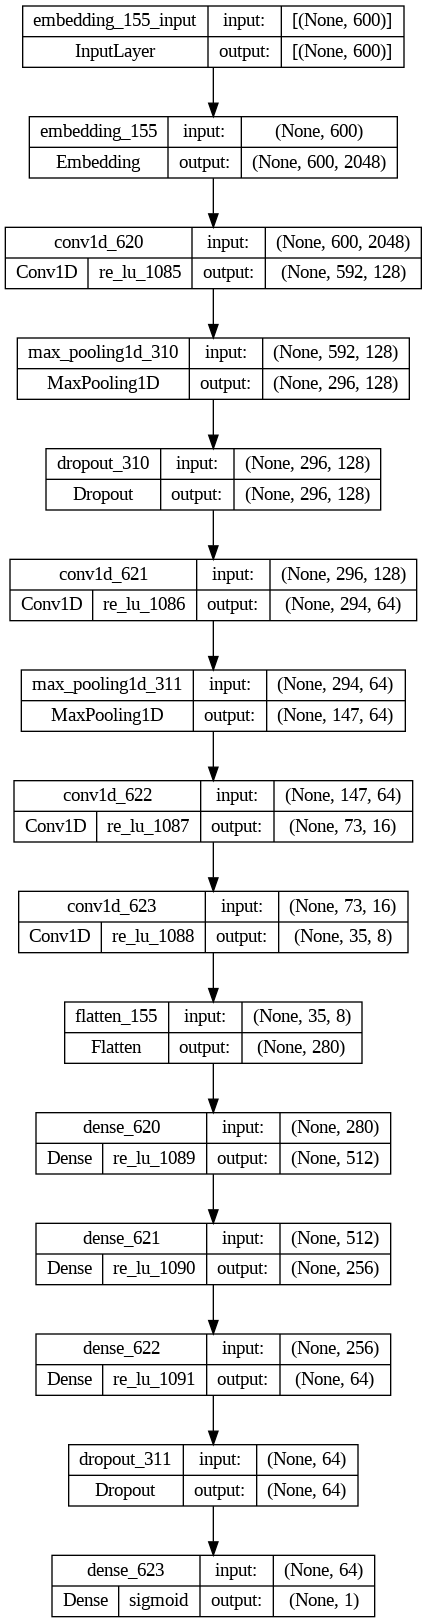

In [ ]:
# visalizing the layers of model.
import tensorflow as tf

tf.keras.utils.plot_model(
model,
to_file="model.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)

# Model Training Phase

In [ ]:
# train the model with batch size of 16 and 45 epochs.
import time as t
start = t.time()
history = model.fit(x_train, 
                    y_train,
                    batch_size=64, # shahla: 16
                    epochs=50, # shahla: 30
                    validation_data=(x_val, y_val))

print("total training time:",t.time()-start)

Epoch 1/50
812/812 [==============================] - 84s 98ms/step - loss: 0.2084 - accuracy: 0.9168 - val_loss: 0.1242 - val_accuracy: 0.9515
Epoch 2/50
812/812 [==============================] - 77s 95ms/step - loss: 0.0796 - accuracy: 0.9722 - val_loss: 0.1077 - val_accuracy: 0.9589
Epoch 3/50
812/812 [==============================] - 77s 94ms/step - loss: 0.0362 - accuracy: 0.9879 - val_loss: 0.1536 - val_accuracy: 0.9551
Epoch 4/50
812/812 [==============================] - 77s 94ms/step - loss: 0.0202 - accuracy: 0.9935 - val_loss: 0.1513 - val_accuracy: 0.9575
Epoch 5/50
812/812 [==============================] - 76s 94ms/step - loss: 0.0194 - accuracy: 0.9942 - val_loss: 0.1572 - val_accuracy: 0.9613
Epoch 6/50
812/812 [==============================] - 76s 94ms/step - loss: 0.0176 - accuracy: 0.9948 - val_loss: 0.1380 - val_accuracy: 0.9632
Epoch 7/50
812/812 [==============================] - 76s 94ms/step - loss: 0.0129 - accuracy: 0.9960 - val_loss: 0.1727 - val_accuracy:

In [ ]:
!pip install keras_flops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2_as_graph

In [ ]:
def get_flops(model, batch_size=None):
    if batch_size is None:
        batch_size = 1

    real_model = tf.function(model).get_concrete_function(tf.TensorSpec([batch_size] + model.inputs[0].shape[1:], model.inputs[0].dtype))
    frozen_func, graph_def = convert_variables_to_constants_v2_as_graph(real_model)

    run_meta = tf.compat.v1.RunMetadata()
    opts = tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()
    flops = tf.compat.v1.profiler.profile(graph=frozen_func.graph,
                                            run_meta=run_meta, cmd='op', options=opts)
    return flops.total_float_ops

In [ ]:
# calculating flops
flops = get_flops(model, batch_size = 16)
print(flops)
print(f"FLOPS: {flops / 10 ** 9:.03} G ")

44945979024
FLOPS: 44.9 G 


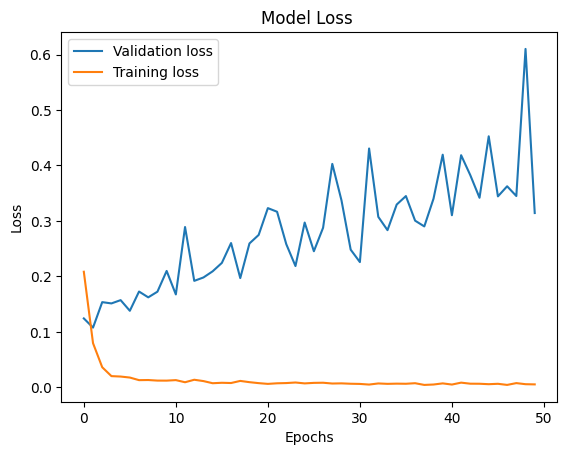

In [ ]:
# Plot training & validation accuracy values

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model Loss ')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Validation loss', 'Training loss'], loc='upper left')
plt.show()

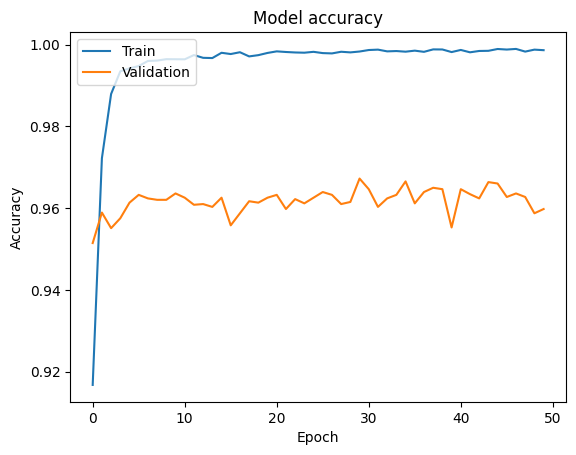

In [ ]:
# Plot training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Testing phase

In [ ]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

Evaluate on test data
451/451 [==============================] - 12s 26ms/step - loss: 0.3205 - accuracy: 0.9628
test loss, test acc: [0.32047706842422485, 0.9628268480300903]


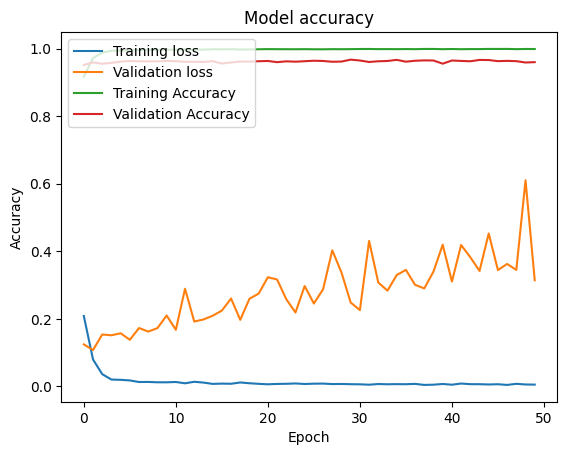

In [ ]:
# Plot training & validation accuracy values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss','Training Accuracy','Validation Accuracy'], loc='upper left')
plt.show()

# Evaluation Phase

In [ ]:
# define a function that allows us to evaluate models

from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,classification_report,roc_curve



def evaluate_model(predict_fun, X_train, y_train, X_test, y_test):
    '''
    evaluate the model, both training and testing accuraries are reported
    '''
    # training acc
    y_predict_train = predict_fun(X_train)
    train_acc = accuracy_score(y_train,y_predict_train)
    
    # testing acc
    y_predict_test = predict_fun(X_test)
    test_acc = accuracy_score(y_test,y_predict_test)
    

    # accuracy = accuracy_score(y_test,y_pred_tex)
    roc_auc =roc_auc_score(y_test, y_predict_test)
    precision = precision_score(y_pred=y_predict_test, y_true=y_test,zero_division=1)
    recall = recall_score(y_pred=y_predict_test, y_true=y_test,zero_division=1)
    
    cr = classification_report(y_test, y_predict_test,zero_division=1)


    fpr, tpr, threshold = roc_curve(y_test, y_predict_test)
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr, label= 'CNN')
    plt.xlabel('False Positive Rate',fontsize=12)
    plt.ylabel('True Positive Rate',fontsize=12)
    plt.title('%s ROC Curve'% 'CNN',fontsize=20)
    plt.legend(fontsize=12)
    plt.show()

    roc_auc_sc = roc_auc_score(y_test,y_predict_test)

    return train_acc, test_acc,cr,roc_auc_sc

451/451 [==============================] - 10s 22ms/step


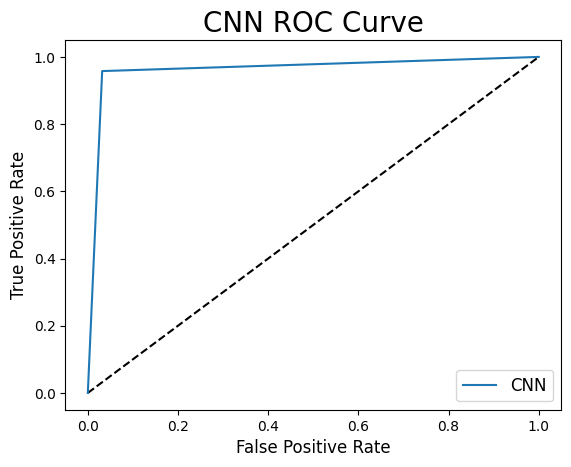

Training Accuracy: 99.92%
Testing Accuracy: 96.28%
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      6944
           1       0.97      0.96      0.96      7475

    accuracy                           0.96     14419
   macro avg       0.96      0.96      0.96     14419
weighted avg       0.96      0.96      0.96     14419

AUC score 0.9630167474531081
Total time required for testing 62.09803032875061


In [ ]:
# Model evaluation
import time as t
start = t.time()
train_acc, test_acc,cr,roc_auc_sc = evaluate_model(lambda x: np.rint(model.predict(x)),
                                     x_train, 
                                     y_train, 
                                     x_test, 
                                     y_test)
print("Training Accuracy: {:.2f}%".format(train_acc*100))
print("Testing Accuracy: {:.2f}%".format(test_acc*100))
print("Classification Report:\n",cr)
print("AUC score",roc_auc_sc)
print("Total time required for testing",t.time()-start)

# Extention with other datasets

In [ ]:
# loading weights of cyberbullying dataset to perform weights transferred on fake news detection for experimental study.
from tensorflow import keras
loaded_model = keras.models.load_model('/content/drive/MyDrive/data/WELFake_Dataset.csv')

OSError: ignored

In [ ]:
loaded_model.summary()

In [ ]:
from keras.layers import Activation, Dense
model_new = Sequential()
# going through until last layer (ommitting last layer as this problem belongs to binary classification)
for layer in loaded_model.layers[:-1]: 
    model_new.add(layer)

# adding final layer with 1 neuron as this is binary classification problem and sigmoid activation function
model_new.add(Dense(1,activation = 'sigmoid'))


# compiling model
model_new.summary()
model_new.compile(optimizer='adam', loss='binary_crossentropy',metrics= ['accuracy'])

In [ ]:
# train the model
import time as t
start = t.time()

# fitting data to model where batch size is defined as 128 and epochs set as 15. Also validating model with 10% validation values of dataset.
history = model_new.fit(x_train, 
                    y_train,
                    batch_size=128,
                    epochs=15,
                    validation_data=(x_val, y_val))
print("total time in training",t.time()-start)

In [ ]:
# evaluate model
import time as t
start = t.time()
train_acc, test_acc,cr,roc_auc_sc = evaluate_model(lambda x: np.rint(model_new.predict(x)),
                                     x_train, 
                                     y_train, 
                                     x_test, 
                                     y_test)
print("Training Accuracy: {:.2f}%".format(train_acc*100))
print("Testing Accuracy: {:.2f}%".format(test_acc*100))
print("Classification Report:\n",cr)
print("AUC score",roc_auc_sc)
print("Total time required for testing",t.time()-start)

In [ ]:
# evaluating model after swapping weights from cyberbullying to fake news.
model_new.evaluate(x_test,y_test)